# DESCRIPTION

## Problem Statement: 

ICMR wants to analyze different types of cancers, such as breast cancer, renal cancer, colon cancer, lung cancer, and prostate cancer becoming a cause of worry in recent years. They would like to identify the probable cause of these cancers in terms of genes responsible for each cancer type. This would lead us to early identification of each type of cancer reducing the fatality rate.

 

## Dataset Details: 

The input dataset contains 802 samples for the corresponding 802 people who have been detected with different types of cancer. Each sample contains expression values of more than 20K genes. Samples have one of the types of tumors: BRCA, KIRC, COAD, LUAD, and PRAD.

 

## Project Task: Week 1

Exploratory Data Analysis:

Merge both the datasets.

Plot the merged dataset as a hierarchically-clustered heatmap.

Perform Null-hypothesis testing.

Dimensionality Reduction:

Each sample has expression values for around 20K genes. However, it may not be necessary to include all 20K genes expression values to analyze each cancer type. Therefore, we will identify a smaller set of attributes which will then be used to fit multiclass classification models. So, the first task targets the dimensionality reduction using various techniques such as,
PCA, LDA, and t-SNE.

Input: Complete dataset including all genes (20531)

Output: Selected Genes from each dimensionality reduction method

 

## Project Task: Week 2

Clustering Genes and Samples:

Our next goal is to identify groups of genes that behave similarly across samples and identify the distribution of samples corresponding to each cancer type. Therefore, this task focuses on applying various clustering techniques, e.g., k-means, hierarchical and mean shift clustering, on genes and samples.

First, apply the given clustering technique on all genes to identify:

Genes whose expression values are similar across all samples

Genes whose expression values are similar across samples of each cancer type 

Next, apply the given clustering technique on all samples to identify:

Samples of the same class (cancer type) which also correspond to the same cluster

Samples identified to be belonging to another cluster but also to the same class (cancer type)

Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer. It also aims at the to do feature selection in order to identify the genes that help in classifying each cancer type.

## Sub-tasks:

Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

Apply the feature selection algorithms, forward selection and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

 

Download the Data sets from https://www.dropbox.com/sh/8q39v4rvo9hq7hy/AAAfAs9J12eevM_9_jPySJ1xa?dl=0.

In [173]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [174]:
labels = pd.read_csv('labels.csv',delimiter=',',engine='python')
data = pd.read_csv('data.csv',delimiter=',',engine='python')
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [175]:
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [176]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [177]:
combined_data = pd.merge(data, labels)

In [178]:
combined_data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [179]:
combined_data.isnull().sum() #clustermap needs Rectangular data for clustering. Cannot contain NAs.

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

In [180]:
heatmap_data = pd.pivot_table(combined_data, index=['Class'])                              
heatmap_data.head()

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


C:\Users\shralva\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


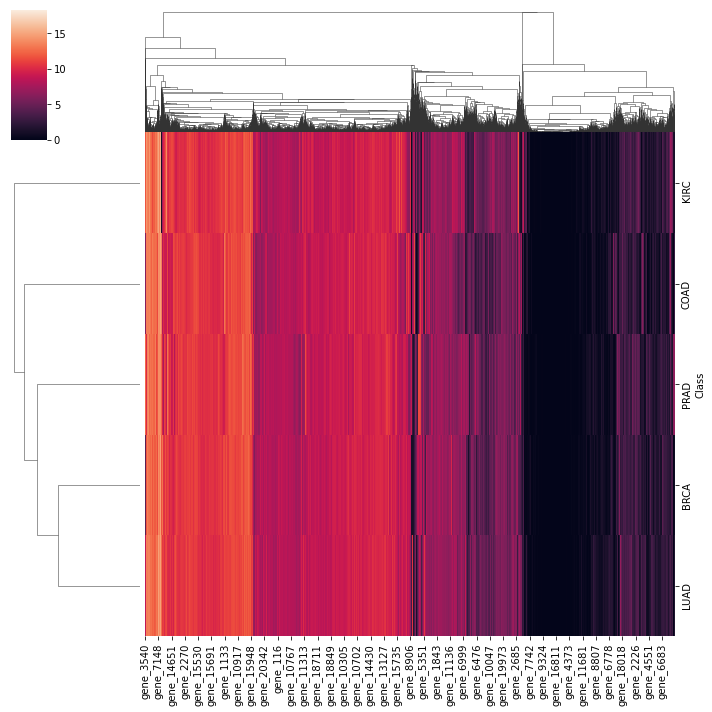

In [181]:
sns.clustermap(heatmap_data)

### Perform Null Hypothesis testing 

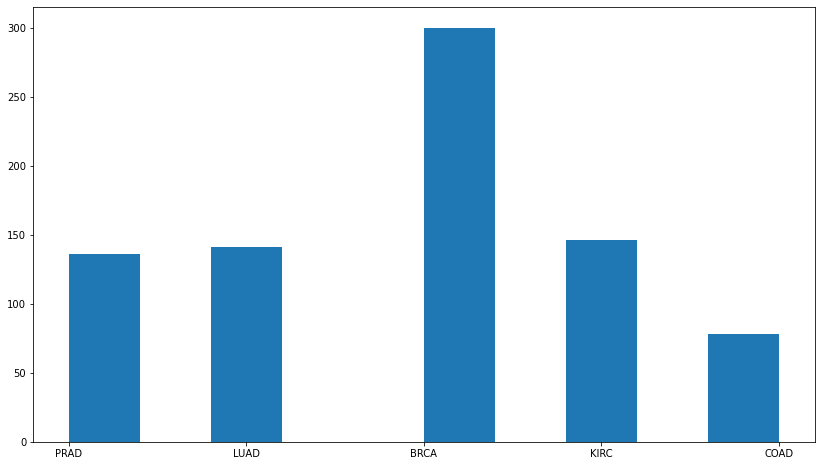

In [182]:
plt.figure(figsize=(14,8))
plt.hist(combined_data['Class'])
plt.show()

In [183]:
rem_sample_data = combined_data.drop(['Unnamed: 0'], axis=1)
rem_sample_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000,BRCA
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000,LUAD
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693,COAD
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000,PRAD


In [184]:
df_f_test = rem_sample_data

### Hypothesis testing using :- F Test

F-tests are named after its test statistic, F, which was named in honor of Sir Ronald Fisher. The F-statistic is simply a ratio of two variances. Variances are a measure of dispersion, or how far the data are scattered from the mean. Larger values represent greater dispersion.

Variance is the square of the standard deviation. For us humans, standard deviations are easier to understand than variances because they’re in the same units as the data rather than squared units. However, many analyses actually use variances in the calculations.

F-statistics are based on the ratio of mean squares. The term “mean squares” may sound confusing but it is simply an estimate of population variance that accounts for the degrees of freedom (DF) used to calculate that estimate.

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

In [185]:
from scipy.stats import f_oneway

In [186]:
gene = "gene_3"
for i in range(3):
    gene = "gene_"+str(i)
    print("Hypothesis Testing for ", gene)
    df_anova = df_f_test[[gene, 'Class']]
    grps = pd.unique(df_anova.Class)
    d_data = {grp:df_anova[gene][df_anova.Class == grp] for grp in grps}
    F, p = f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])
    print("F-stat" , F, "  P-val: ",p)
    print(p)
    if(p < 0.05):
        print("Reject null hypothesis")
    else:
        print("Cannot reject null hypothesis")
    print("----------------------------")

Hypothesis Testing for  gene_0
F-stat 2.1322967854919392   P-val:  0.07505540778266195
0.07505540778266195
Cannot reject null hypothesis
----------------------------
Hypothesis Testing for  gene_1
F-stat 23.11246471467732   P-val:  4.315349359726914e-18
4.315349359726914e-18
Reject null hypothesis
----------------------------
Hypothesis Testing for  gene_2
F-stat 60.1327313546882   P-val:  2.1468844023159446e-44
2.1468844023159446e-44
Reject null hypothesis
----------------------------


In [187]:
#K2 normality test 
from scipy.stats import normaltest
classInt = rem_sample_data['Class'].map({'PRAD': 1, 'LUAD': 2, 'BRCA': 3, 'KIRC': 4, 'COAD': 5})

stat, p = normaltest(classInt)
print('stat=%.2f, p=%.30f' %(stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not Normal')

stat=48.54, p=0.000000000028833417148493984116
Not Normal


### Dimensionality reduction: Perform PCA 
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

In [188]:
from sklearn.preprocessing import StandardScaler
X = rem_sample_data.drop(['Class'], axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [189]:
from sklearn.decomposition import PCA
pca_95 = PCA(n_components = 0.995)
X_scaled

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [190]:
X_scaled_pca95 = pca_95.fit_transform(X_scaled)
print(X_scaled_pca95)
print(X_scaled_pca95.shape)

[[-5.74469869e+01  9.54109807e+01  7.43015433e+01 ... -3.56477632e-01
  -8.51167526e-01 -4.72912001e-01]
 [-1.69194301e+01  7.32470333e-01 -6.40728996e+01 ... -3.53561492e-01
   5.20652196e-01 -3.38981908e-02]
 [-7.03452179e+01 -1.93033266e+01  2.04882405e+01 ... -2.25456230e-01
   1.87995725e-01 -5.08107596e-02]
 ...
 [-4.13308968e+00  1.56900139e+01 -2.26444535e+01 ...  6.10203646e-02
   1.44891459e-01 -6.82958741e-02]
 [-3.08147575e+01  3.35264225e+01  7.05656359e+01 ...  6.21979767e-01
  -1.96681583e-01 -5.90042742e-01]
 [-2.23445567e+01  4.05235632e+00  3.23278757e+01 ... -7.24486355e-01
   3.07244329e-01 -6.50144576e-01]]
(801, 759)


In [191]:
df_vis = pd.DataFrame(X_scaled_pca95)
df_vis['cancer_type'] = rem_sample_data['Class']

<AxesSubplot:xlabel='0', ylabel='1'>

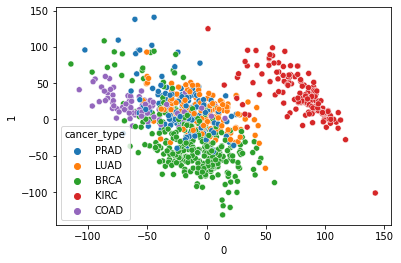

In [192]:
sns.scatterplot(x = 0, y = 1, hue='cancer_type', data=df_vis)

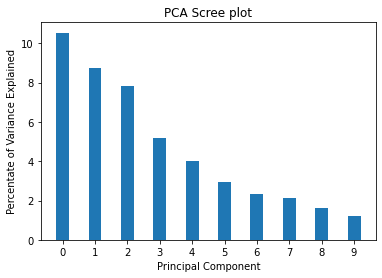

In [193]:
height_ = np.round(pca_95.explained_variance_ratio_[0:10]*100, 2)
lbls = [str(i) for i in range(0,10)]
plt.bar(x = list(range(0, 20, 2)), height = height_, tick_label = lbls)
plt.title("PCA Scree plot")
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.show()

### Dimensionality reduction using LDA 

Linear Discriminant Analysis, or LDA for short, is a predictive modeling algorithm for multi-class classification. It can also be used as a dimensionality reduction technique, providing a projection of a training dataset that best separates the examples by their assigned class.

The ability to use Linear Discriminant Analysis for dimensionality reduction often surprises most practitioners.

In [194]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
df_lda = lda.fit(X, classInt).transform(X)

In [195]:
lda.explained_variance_ratio_

array([0.36219022, 0.30156109, 0.2098531 , 0.12639559])

In [196]:
df_lda = pd.DataFrame(data = df_lda)

In [197]:
df_lda['y'] = classInt
df_lda

,0,1,2,3,y
0,-7.958125,10.922818,-1.977301,0.584694,1
1,-0.301563,-2.780898,4.002351,-7.993575,2
2,-6.424952,8.870978,-1.488272,0.519171,1
3,-6.934259,10.417199,-3.695386,-0.343774,1
4,-2.872004,-4.912284,-2.841613,2.199768,3
...,...,...,...,...,...
796,-2.491183,-6.516482,-4.649458,1.334609,3
797,0.217789,-1.859410,4.089409,-7.695062,2
798,-1.426674,-0.474514,10.053818,4.078872,5
799,-7.800641,12.104337,-1.948730,0.255706,1


<AxesSubplot:xlabel='0', ylabel='1'>

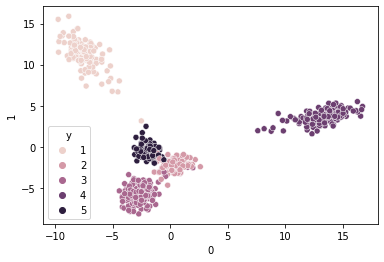

In [198]:
sns.scatterplot(x = 0, y = 1, data=df_lda, hue = 'y')

### Dimensionality reduction using  TSNE

T-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.


In [199]:
from sklearn.manifold import TSNE
tsnemodel = TSNE(learning_rate = 50)
tsne_features = tsnemodel.fit_transform(X)
print(tsne_features)

[[  5.7247915 -34.22515  ]
 [  2.2685077   2.2264228]
 [ 14.284472  -32.477802 ]
 ...
 [ -1.6262875  32.36898  ]
 [  8.740463  -31.535536 ]
 [  7.2310615 -25.112537 ]]


In [200]:
df_tsne = pd.DataFrame(tsne_features, columns = ['c1', 'c2'])

In [201]:
df_tsne.head()

,c1,c2
0,5.724792,-34.225151
1,2.268508,2.226423
2,14.284472,-32.477802
3,13.626367,-31.855429
4,-30.925413,0.478282


In [202]:
df_tsne['cancer_type'] = rem_sample_data['Class']

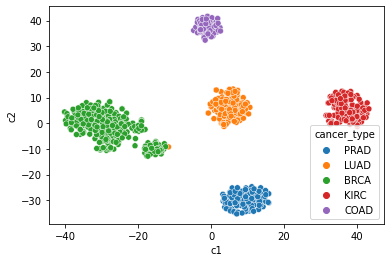

In [203]:
sns.scatterplot(x = 'c1', y = 'c2', hue = 'cancer_type', data = df_tsne)
plt.show()

## KMeans clustering


In [204]:
from sklearn.cluster import KMeans
clusters_95 = KMeans(n_clusters=5, init="k-means++", n_init = 10, max_iter = 300, random_state = 0)
clusters_95.fit_transform(X_scaled_pca95)
clusters_95.labels_

array([3, 2, 3, 3, 0, 3, 4, 3, 0, 3, 0, 4, 3, 2, 0, 0, 2, 4, 4, 3, 0, 4,
       2, 0, 4, 2, 1, 0, 2, 0, 0, 0, 4, 2, 3, 0, 4, 2, 0, 2, 4, 3, 3, 4,
       4, 0, 3, 1, 0, 2, 0, 2, 0, 3, 1, 2, 0, 1, 4, 0, 2, 2, 0, 2, 3, 1,
       0, 3, 4, 2, 4, 0, 2, 2, 0, 2, 0, 2, 3, 1, 0, 3, 0, 0, 3, 3, 0, 0,
       4, 2, 3, 3, 0, 2, 0, 3, 1, 0, 3, 0, 0, 4, 0, 4, 2, 4, 2, 1, 2, 2,
       3, 0, 2, 3, 0, 4, 4, 4, 0, 0, 2, 4, 2, 0, 3, 3, 3, 0, 4, 0, 1, 2,
       1, 0, 0, 4, 2, 0, 4, 1, 0, 3, 0, 4, 2, 1, 3, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 3, 3, 2, 3, 2, 4, 0, 3, 2, 1, 4, 2, 0, 4, 2, 0, 2, 0, 2,
       0, 3, 0, 4, 1, 4, 0, 3, 3, 3, 2, 2, 0, 2, 2, 4, 2, 3, 2, 0, 2, 0,
       2, 2, 0, 4, 4, 4, 4, 3, 2, 3, 2, 2, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0,
       4, 2, 4, 4, 2, 0, 4, 3, 0, 2, 2, 3, 1, 2, 4, 3, 4, 1, 2, 4, 4, 2,
       3, 2, 2, 2, 4, 0, 2, 1, 0, 3, 2, 0, 3, 4, 3, 3, 3, 0, 1, 1, 2, 1,
       1, 3, 2, 0, 0, 4, 4, 0, 1, 3, 4, 3, 0, 0, 4, 0, 0, 0, 2, 2, 2, 0,
       0, 0, 4, 4, 4, 4, 2, 0, 0, 4, 0, 0, 2, 3, 0,

In [205]:
df_clustering = pd.DataFrame(data = X_scaled_pca95)
df_clustering['Cluster label'] = clusters_95.labels_
df_clustering['Class'] = rem_sample_data["Class"]

In [206]:
df_clustering.head()

,0,1,2,3,4,5,6,7,8,9,...,751,752,753,754,755,756,757,758,Cluster label,Class
0,-57.446987,95.410981,74.301543,-12.166781,7.981831,36.157573,-7.668542,19.951444,0.142216,3.035240,...,0.910286,0.570970,-0.143617,-0.295019,-0.972512,-0.356478,-0.851168,-0.472912,3,PRAD
1,-16.919430,0.732470,-64.072900,-2.095308,-25.426430,27.784178,-16.132765,-17.031383,-22.023874,-27.923308,...,0.037139,-0.195932,-0.060466,-0.299392,0.388111,-0.353561,0.520652,-0.033898,2,LUAD
2,-70.345218,-19.303327,20.488240,48.102893,24.437757,17.462510,20.706772,-47.626817,-28.647648,-12.784676,...,0.046303,-0.620765,-0.223858,0.206672,0.261850,-0.225456,0.187996,-0.050811,3,PRAD
3,-49.161591,-9.227586,61.243770,37.805744,1.038889,23.240002,-4.801039,-21.554809,-15.375067,-12.881511,...,0.560625,0.483862,0.409201,-0.052218,1.014806,-0.008708,-0.126512,-0.273687,3,PRAD
4,-18.132534,-51.327797,16.598116,-17.699201,26.389130,-1.551573,-6.266101,12.336677,-4.233837,28.804476,...,0.920014,1.547086,-1.349829,-0.852537,0.885260,0.276516,1.715377,1.265111,0,BRCA


In [207]:
for g in ["PRAD", "LUAD", "BRCA", "COAD", "KIRC"]:
    print("Group : ",g)
    prad_data = df_clustering.groupby('Class').get_group(g)
    print(prad_data['Cluster label'].value_counts())
    print("----------------")

Group :  PRAD
3    134
2      1
0      1
Name: Cluster label, dtype: int64
----------------
Group :  LUAD
2    139
0      2
Name: Cluster label, dtype: int64
----------------
Group :  BRCA
0    247
2     53
Name: Cluster label, dtype: int64
----------------
Group :  COAD
1    74
2     4
Name: Cluster label, dtype: int64
----------------
Group :  KIRC
4    144
2      2
Name: Cluster label, dtype: int64
----------------


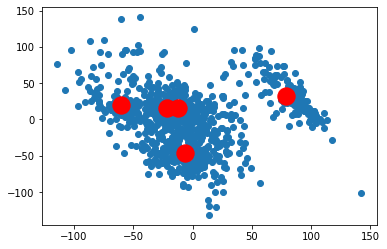

In [210]:
pred_y = clusters_95.fit_predict(X_scaled_pca95)
plt.scatter(X_scaled_pca95[:, 0], X_scaled_pca95[:,1])
plt.scatter(clusters_95.cluster_centers_[:, 0], clusters_95.cluster_centers_[:,1], s=300, c = 'red')
plt.show()

In [211]:
rem_sample_data_y = rem_sample_data['Class'].map({'PRAD': 3, 'LUAD': 2, 'BRCA': 0, 'KIRC': 4, 'COAD': 1})
print(str.format("Classification error: {:.2f} %" , (rem_sample_data_y != pred_y).sum()/(rem_sample_data_y.shape[0])*100))

Classification error: 7.87 %


## Build Classification Models


Building Classification Model(s) with Feature Selection:

Our final task is to build a robust classification model(s) for identifying each type of cancer.

Sub-tasks:

Build a classification model(s) using multiclass SVM, Random Forest, and Deep Neural Network to classify the input data into five cancer types

Apply the feature selection algorithms, forward selection, and backward elimination to refine selected attributes (selected in Task-2) using the classification model from the previous step

Validate the genes selected from the last step using statistical significance testing (t-test for one vs. all and F-test)

In [215]:
df_x = df_lda.drop(['y'], axis = 1)
df_y = df_lda.y
print(df_x.shape, df_y.shape)


(801, 4) (801,)


In [247]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=0)

In [248]:
print(x_train.shape, " ", x_test.shape)

(560, 4)   (241, 4)


In [252]:
from sklearn import tree

dtree_clf = tree.DecisionTreeClassifier(max_depth = 5)
dtree_clf.fit(x_train, y_train)
#dtree_clf.score(x_test, y_test)

y_pred = dtree_clf.predict(x_test)

In [253]:
y_pred.shape, y_test.shape

((241,), (241,))

In [254]:
print(dtree_clf.score(x_test, y_test))

0.995850622406639


## SVM

Support vector machine algorithm is used to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [256]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

sv_clf = SVC(probability = True, kernel='linear')
sv_clf.fit(x_train, y_train)
print(sv_clf.score(x_test, y_test))

1.0


In [257]:
y_pred = sv_clf.predict(x_test)
print(accuracy_score(y_test, y_pred))

1.0


## RandomForest

In [259]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators = 50)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

0.995850622406639

### NaiveBayes Classifier

In [260]:
from sklearn.naive_bayes import GaussianNB

gb_clf = GaussianNB()
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)

1.0

### KNN Classifier

In [266]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(x_train,y_train)
knn_clf.score(x_test,y_test)

1.0

### Recursive Feature Elimination

In [267]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [272]:
X, y = make_classification(n_samples = 1000, n_features = 10, n_informative = 5, n_redundant = 5)
rfe = RFECV(estimator = DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs = -1, error_score='raise')
print('Accuracy : %.3f (%.3f)' %(mean(n_scores), std(n_scores)))

Accuracy : 0.868 (0.033)


In [273]:
n_scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy', cv=cv, n_jobs = -1, error_score='raise')
print('Accuracy : %.3f (%.3f)' %(mean(n_scores), std(n_scores)))

Accuracy : 0.999 (0.003)


In [274]:
df_tsne

,c1,c2,cancer_type
0,5.724792,-34.225151,PRAD
1,2.268508,2.226423,LUAD
2,14.284472,-32.477802,PRAD
3,13.626367,-31.855429,PRAD
4,-30.925413,0.478282,BRCA
...,...,...,...
796,-30.751970,2.615243,BRCA
797,6.585237,12.426444,LUAD
798,-1.626287,32.368980,COAD
799,8.740463,-31.535536,PRAD


In [277]:
for c in df_tsne.drop(['cancer_type'], axis = 1).columns:
    print(c)
    df_anova = df_tsne[[c, 'cancer_type']]
    grps = pd.unique(df_anova.cancer_type)
    d_data = {grp:df_anova[c][df_anova.cancer_type == grp] for grp in grps}
    F, p = f_oneway(d_data['PRAD'], d_data['LUAD'], d_data['BRCA'], d_data['KIRC'], d_data['COAD'])
    print("F-stat" , F, "  P-val: ",p)
    print(p)
    if(p < 0.05):
        print("Reject null hypothesis")
    else:
        print("Cannot reject null hypothesis")
    print("----------------------------")

c1
F-stat 4832.412440707898   P-val:  0.0
0.0
Reject null hypothesis
----------------------------
c2
F-stat 3542.1375309493033   P-val:  0.0
0.0
Reject null hypothesis
----------------------------


## DNN 

The neural network needs to learn all the time to solve tasks in a more qualified manner or even to use various methods to provide a better result. When it gets new information in the system, it learns how to act accordingly to a new situation.

Learning becomes deeper when tasks you solve get harder. Deep neural network represents the type of machine learning when the system uses many layers of nodes to derive high-level functions from input information. It means transforming the data into a more creative and abstract component.

In order to understand the result of deep learning better, let's imagine a picture of an average man. Although you have never seen this picture and his face and body before, you will always identify that it is a human and differentiate it from other creatures. This is an example of how the deep neural network works. Creative and analytical components of information are analyzed and grouped to ensure that the object is identified correctly. These components are not brought to the system directly, thus the ML system has to modify and derive them. 

In [285]:
features = rem_sample_data.drop(['Class'], axis = 1)
y = pd.get_dummies(classInt)
y

,1,2,3,4,5
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
796,0,0,1,0,0
797,0,1,0,0,0
798,0,0,0,0,1
799,1,0,0,0,0


In [279]:
import tensorflow as tf

In [286]:
x_dnn_train, x_dnn_test, y_dnn_train, y_dnn_test = train_test_split(features, y, test_size = 0.1)

In [296]:
x_dnn_train.shape, x_dnn_test.shape, y_dnn_train.shape, y_dnn_test.shape

((720, 20531), (81, 20531), (720, 5), (81, 5))

In [297]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1024, input_dim = features.shape[1], activation = 'relu',
                               kernel_initializer = 'he_uniform'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(512, activation = 'relu'))

model.add(tf.keras.layers.Dense(256, activation = 'relu'))

model.add(tf.keras.layers.Dense(128, activation = 'relu'))

model.add(tf.keras.layers.Dense(5, activation = 'softmax'))

sgd_optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)

model.compile(optimizer = sgd_optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [298]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1024)              21024768  
                                                                 
 batch_normalization_3 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                      

In [299]:
history = model.fit(x_dnn_train, y_dnn_train, 
                    validation_data = (x_dnn_test, y_dnn_test),
                   epochs = 5,
                   batch_size = 32)

Epoch 1/5
23/23 [==============================] - 3s 83ms/step - loss: 0.2136 - accuracy: 0.9444 - val_loss: 0.6076 - val_accuracy: 0.8025
Epoch 2/5
23/23 [==============================] - 2s 69ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9753
Epoch 3/5
23/23 [==============================] - 2s 71ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0202 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 2s 71ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 2s 69ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000


In [302]:
modelop = model.predict(x_dnn_test)
modelop[0:5]

3/3 [==============================] - 0s 16ms/step


array([[6.7360073e-05, 7.6026969e-05, 9.9934047e-01, 4.2101434e-05,
        4.7407547e-04],
       [2.4850406e-05, 9.9977571e-01, 4.6865156e-05, 5.4158678e-05,
        9.8469805e-05],
       [4.7302099e-05, 9.9965847e-01, 4.6192996e-05, 3.5219546e-05,
        2.1272217e-04],
       [1.9313999e-05, 3.6224421e-05, 9.9983656e-01, 7.3737901e-06,
        1.0047362e-04],
       [6.7173198e-05, 3.4712241e-03, 1.7458331e-04, 2.6823528e-04,
        9.9601883e-01]], dtype=float32)

In [311]:
modelop.shape, y_dnn_test.shape

((81, 5), (81, 5))

In [303]:
np.argmax(modelop[0])

2

In [318]:
def label(y, type = 'array'):
    op = []
    if(type == 'array'):
        for i in y:
            op.append(np.argmax(i))
    else:
        for i in y.values:
            op.append(np.argmax(i))
    return op

In [319]:
label(modelop)

[2,
 1,
 1,
 2,
 4,
 2,
 2,
 0,
 2,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 4,
 0,
 0,
 3,
 0,
 2,
 3,
 0,
 3,
 2,
 3,
 3,
 2,
 1,
 2,
 0,
 1,
 3,
 0,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 0,
 0,
 1,
 2,
 4,
 3,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 4,
 1,
 2,
 2,
 0,
 4,
 2,
 2,
 1,
 4,
 3,
 0,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 0]

In [320]:
from sklearn.metrics import confusion_matrix

confusion_matrix(label(modelop), label(y_dnn_test, type = 'df'))

array([[12,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  0, 35,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  6]], dtype=int64)

In [321]:
_, train_acc = model.evaluate(x_dnn_train, y_dnn_train, verbose = 0)
_, test_acc = model.evaluate(x_dnn_test, y_dnn_test, verbose = 0)
print('Train %.3f , Test = %.3f', (train_acc, test_acc))

Train %.3f , Test = %.3f (1.0, 1.0)


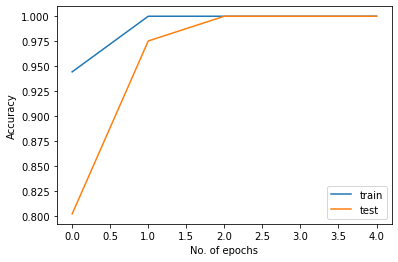

In [322]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel("No. of epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()